# Gravity model

In [1]:
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
from pandas.stats.api import ols
%pylab inline
RootPath = '/Users/CQ/Documents/Project1'

Populating the interactive namespace from numpy and matplotlib


In [2]:
from GravModel import GravModel as GM

Failed `CDLL(/Library/Frameworks/GEOS.framework/Versions/Current/GEOS)`


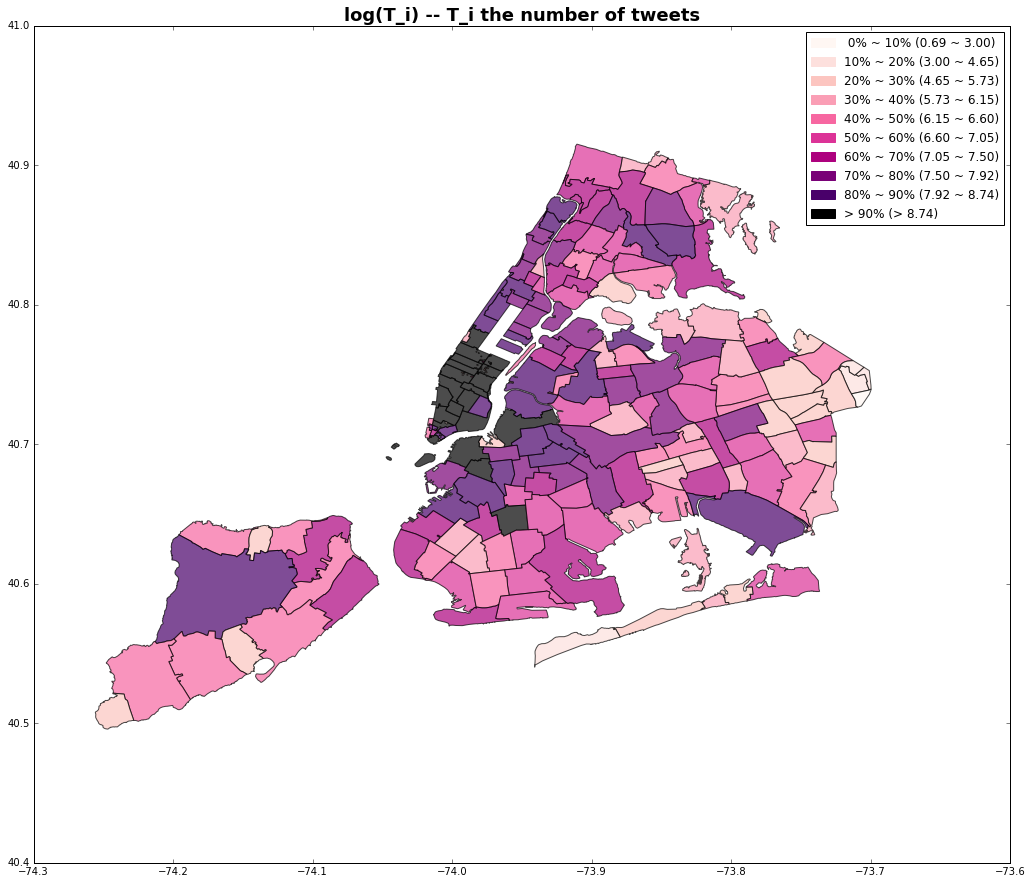

In [3]:
fig2 = plt.figure(figsize=(18,15))
GM.PlotMap(GM.DF_Wout2, fig2, key = 'log_cent', cmap_name='RdPu', title = 'log(T_i) -- T_i the number of tweets')

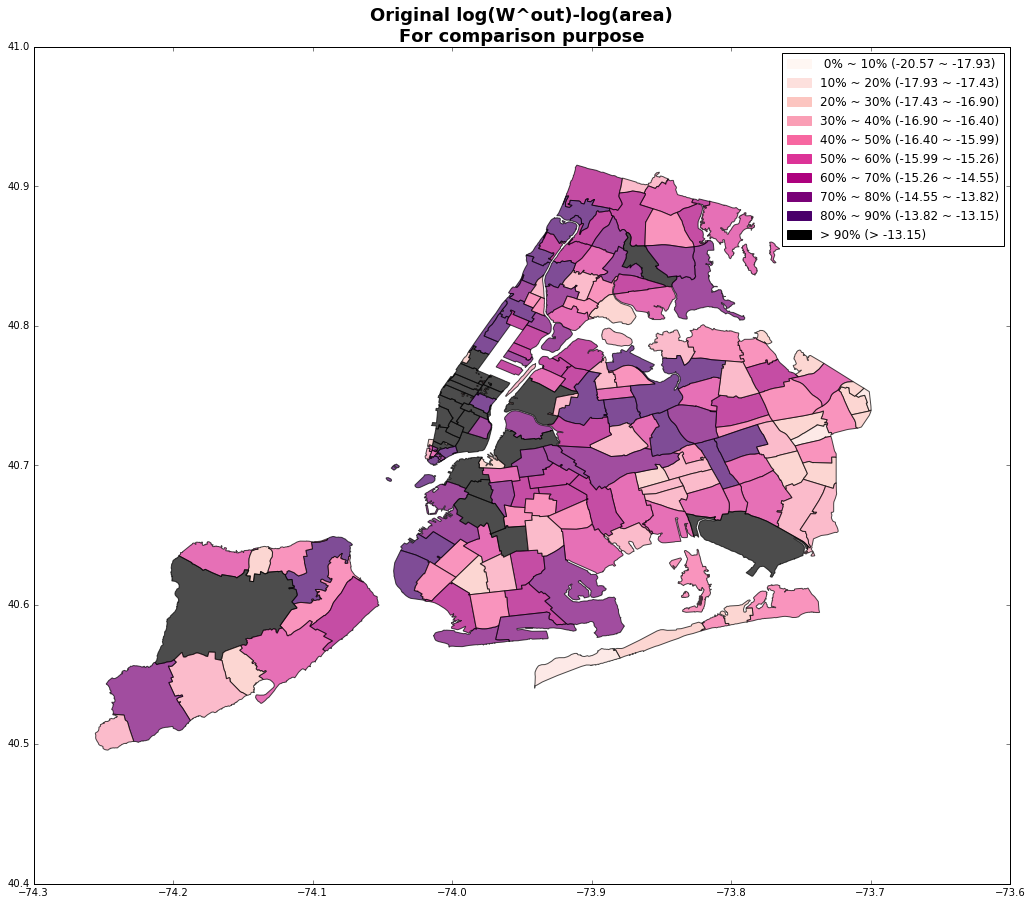

In [4]:
fig1 = plt.figure(figsize=(18,15))
GM.PlotMap(GM.DF_Wout2, fig1, key = 'weight', cmap_name='RdPu', 
        title = 'Original log(W^out)-log(area)\nFor comparison purpose', density=1)

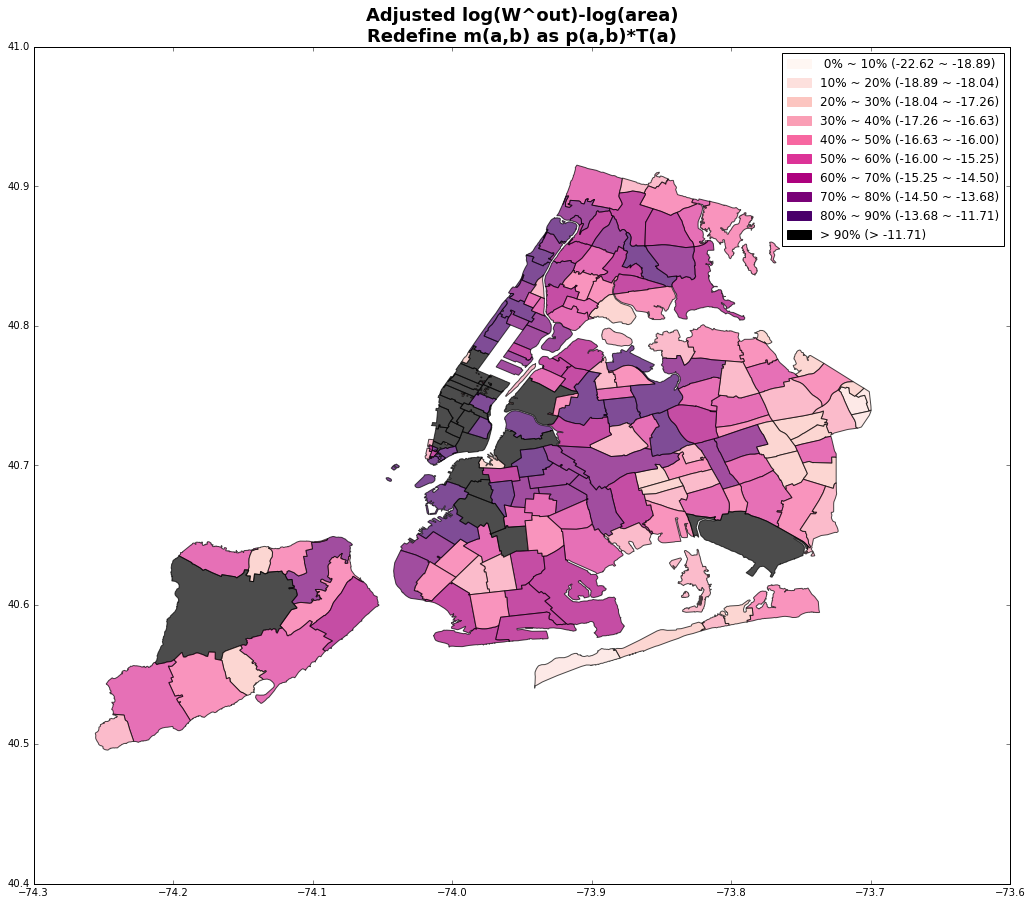

In [5]:
fig3 = plt.figure(figsize=(18,15))
GM.PlotMap(GM.DF_Wout2_adj, fig3, key = 'weight', cmap_name='RdPu',
        title = 'Adjusted log(W^out)-log(area)\nRedefine m(a,b) as p(a,b)*T(a)', density=1)

# Next adjust weight by adding T(a):  $m(a,b) = T(a) \cdot p(a,b)$

## First take a look at the $log(W^{out}_i)$ and $log(W^{in}_i)$, see if they only differ from an amount of $log(T(a))$

In [5]:
diff = GM.DF_Win2_adj.weight + GM.DF_Wout2_adj.log_cent - GM.DF_Wout2_adj.weight

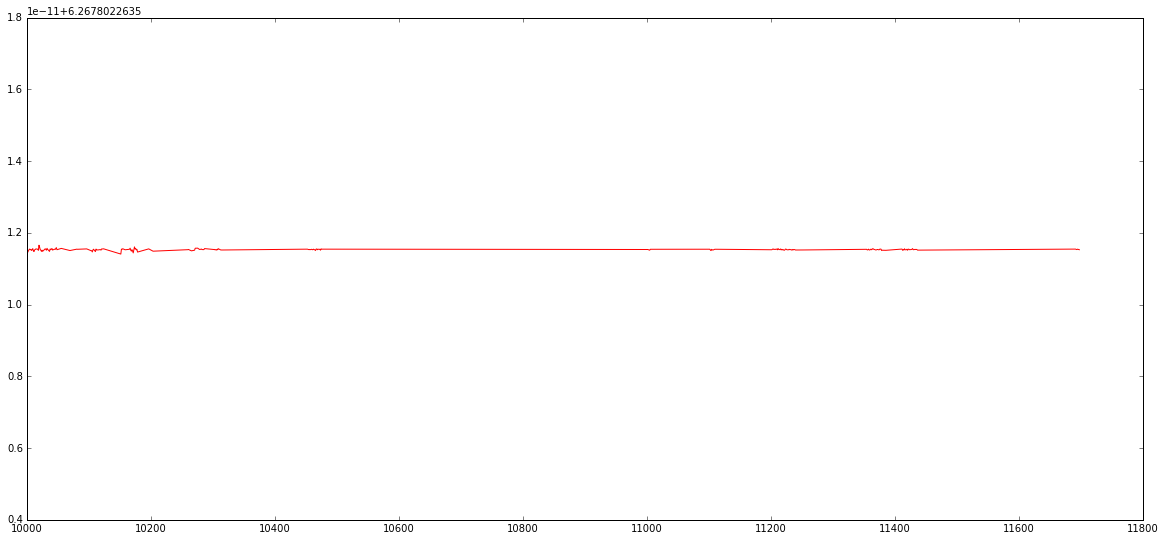

In [11]:
plt.plot(GM.PLACES, diff,'-r')

## So after our adjustment $m(a,b) = T(a) \cdot p(a,b)$, the difference between $log(W^{out}_i)$ vs $log(W^{in}_i) + log(T_i)$ is indeed a constant, but not zero.
### According to the computation, $$log(W^{out}_i) - (log(W^{in}_i) + log(T_i)) = 6.267802$$ Consider $log(6.267802) \approx 1.8354$ and $exp(6.267802)\approx 527.317 $, none of them makes sense to me where this number comes from.

## We take a glance at the relationship of $ln(W^{out}_i)$ vs $ln(T_i)$
## where $T_i$ denotes the number of tweets posted within zip code $i$

The coefficients of this model are: c = 0.906160, d = -5.741231
The R square of this model is 0.923247


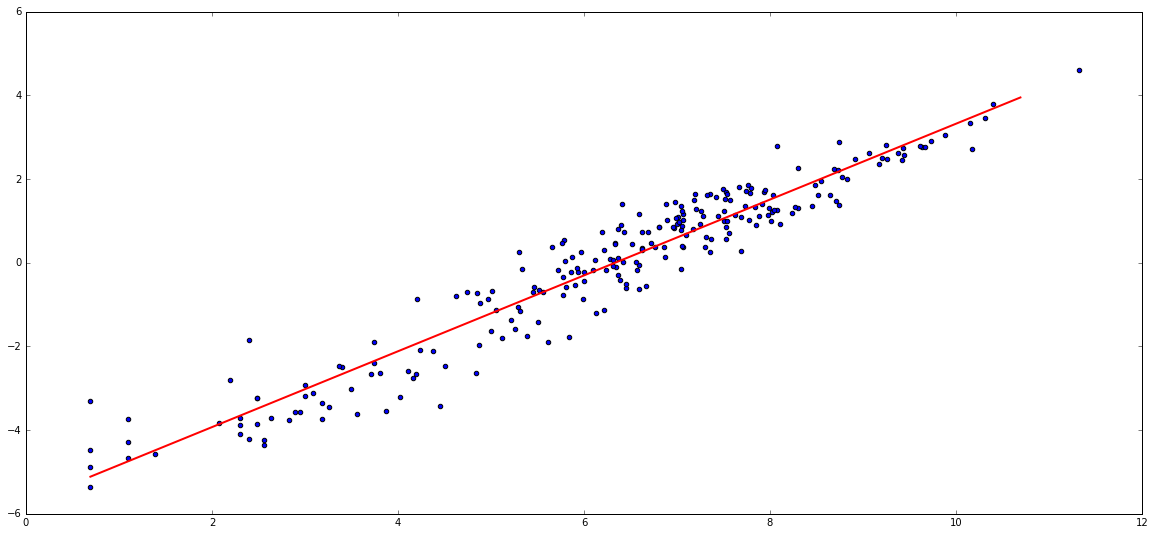

In [6]:
X = GM.DF_Wout2.log_cent
Y = GM.DF_Wout2.weight
WOvsT = ols(x=X,y=Y)
(c,d) = WOvsT.beta
plt.scatter(X, Y)
plt.plot(np.arange(min(X), max(X)), [c*i+d for i in np.arange(min(X), max(X))], '-r', lw=2)
print('The coefficients of this model are: c = %f, d = %f'%(c,d))
print('The R square of this model is %f'%WOvsT.r2)

In [43]:
WOvsT


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         238
Number of Degrees of Freedom:   2

R-squared:         0.9232
Adj R-squared:     0.9229

Rmse:              0.5606

F-stat (1, 236):  2838.8065, p-value:     0.0000

Degrees of Freedom: model 1, resid 236

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.9062     0.0170      53.28     0.0000     0.8728     0.9395
     intercept    -5.7412     0.1126     -50.98     0.0000    -5.9620    -5.5205
---------------------------------End of Summary---------------------------------

### So the values of $ln(W^{out}_i)$ are indeed showing strong linear correlation with $ln(T_i)$, which inspires us to predict $ln(W^{out}_i)$ as long as $T_i$ are available.
### And the model looks like this $$ln(W^{out}_i) \approx 0.906160 \cdot ln(T_i) - 5.741231$$ or equivalently, $$W^{out}_i \approx  0.00321 \cdot T^{0.90616}_i$$

# And it's worth noticing that the relationship between $W^{out}_i$ and $T_i$ is underlinear, 1 is not even in our 95% confidence interval.

## Next we present the $ln(f(distance))$ with respect to the average distance within each bin, where the bins are determined by the percentile of distribution of all distance data in NYC

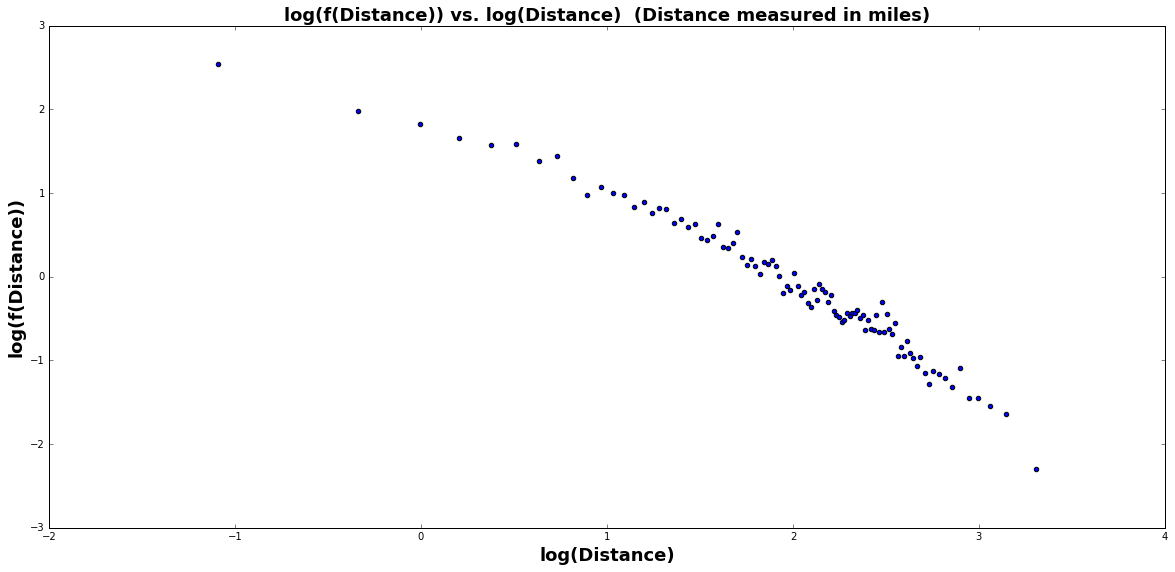

In [4]:
plt.scatter(GM.logDist, GM.F_Dist2_adj.f_Dist)
plt.title('log(f(Distance)) vs. log(Distance)  (Distance measured in miles)', fontweight = 'bold', size = 18)
plt.ylabel('log(f(Distance))', fontweight = 'bold', size = 18)
plt.xlabel('log(Distance)', fontweight = 'bold', size = 18)

# Model 1 $$f(dist) = \frac {1}{a \cdot dist + b}$$

The coefficients of this model are a = 0.184839, b = -0.217617
The R square of this model is 0.922512


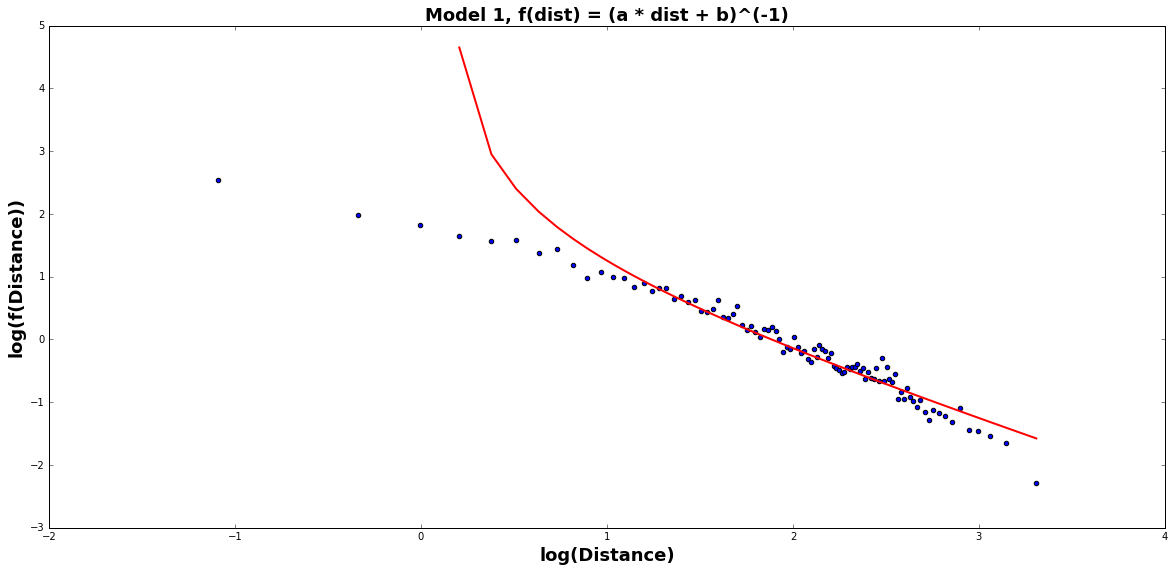

In [5]:
plt.scatter(GM.logDist, GM.F_Dist2_adj.f_Dist)
plt.ylabel('log(f(Distance))', fontweight = 'bold', size = 18)
plt.xlabel('log(Distance)', fontweight = 'bold', size = 18)
model1 = ols(y = 1.0/exp(GM.F_Dist2_adj.f_Dist)[:-10], x = pd.DataFrame(GM.DistMean2_adj)[:-10])
(a1,b1) = model1.summary_as_matrix.loc['beta']
plt.plot(GM.logDist, [-log(a1*exp(i)+b1) for i in GM.logDist], '-r', lw = 2)
plt.title('Model 1, f(dist) = (a * dist + b)^(-1)', fontweight = 'bold', size = 18)

print('The coefficients of this model are a = %f, b = %f'%(a1,b1))
print('The R square of this model is %f'%model1.r2)

In [8]:
model1


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <0> + <intercept>

Number of Observations:         90
Number of Degrees of Freedom:   2

R-squared:         0.9225
Adj R-squared:     0.9216

Rmse:              0.2116

F-stat (1, 88):  1047.6580, p-value:     0.0000

Degrees of Freedom: model 1, resid 88

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             0     0.1848     0.0057      32.37     0.0000     0.1736     0.1960
     intercept    -0.2176     0.0492      -4.43     0.0000    -0.3140    -0.1213
---------------------------------End of Summary---------------------------------

# Model 2 $$f(dist) = e^b \cdot dist^a$$
## In other words, $ln(f(dist)) = a \cdot ln(dist) + b$

The coefficients of this model are a = -1.107471, b = 2.078107
The R square of this model is 0.957354


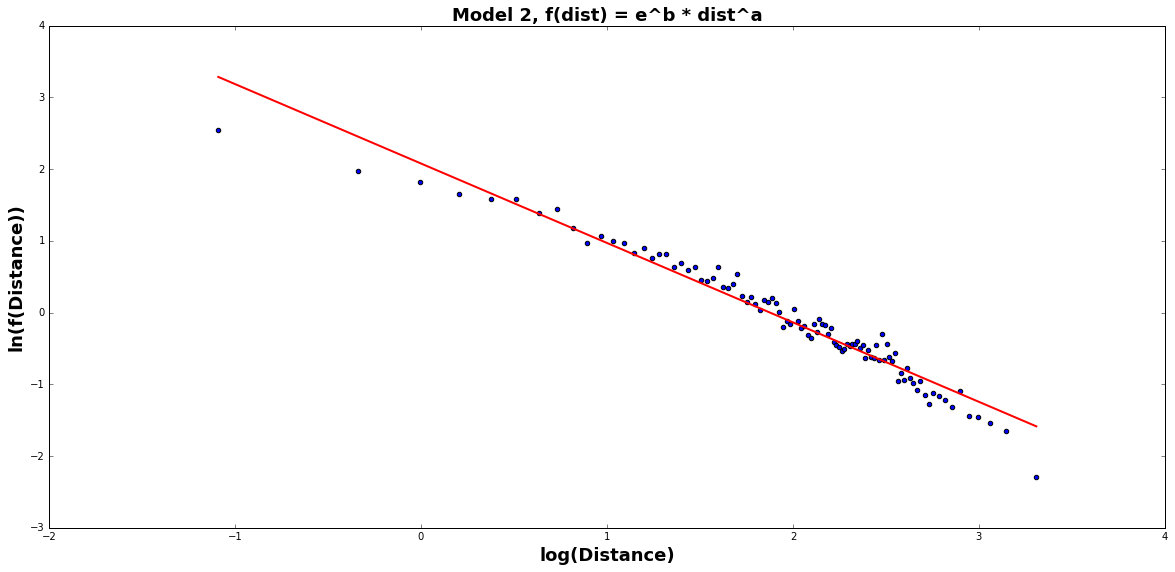

In [6]:
model2 = ols(y = GM.F_Dist2_adj.f_Dist, x = pd.DataFrame(log(GM.DistMean2_adj)))
(a2,b2) = model2.beta

plt.scatter(GM.logDist, GM.F_Dist2_adj.f_Dist)
plt.title('Model 2, f(dist) = e^b * dist^a', fontweight = 'bold', size = 18)
plt.ylabel('ln(f(Distance))', fontweight = 'bold', size = 18)
plt.xlabel('log(Distance)', fontweight = 'bold', size = 18)
plt.plot(GM.logDist,[a2*i+b2 for i in GM.logDist],'-r',lw=2)
print('The coefficients of this model are a = %f, b = %f'%(a2,b2))
print('The R square of this model is %f'%model2.r2)

In [10]:
model2


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <0> + <intercept>

Number of Observations:         100
Number of Degrees of Freedom:   2

R-squared:         0.9574
Adj R-squared:     0.9569

Rmse:              0.1817

F-stat (1, 98):  2199.9639, p-value:     0.0000

Degrees of Freedom: model 1, resid 98

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             0    -1.1075     0.0236     -46.90     0.0000    -1.1537    -1.0612
     intercept     2.0781     0.0496      41.92     0.0000     1.9810     2.1753
---------------------------------End of Summary---------------------------------

# Model 3
## More generally, $$f(dist) = a \cdot dist^q + b$$We start by trying $q$ =-1, and then we search for $q^*$ in an interval such that the $R^2$ of our model achieves its maximum at $q^*$

q = -1

x3 = [i**q for i in GM.DistMean2_adj]
plt.scatter(GM.logDist, GM.F_Dist2_adj.f_Dist)
model3 = ols(y = exp(GM.F_Dist2_adj.f_Dist), x = pd.DataFrame(x3))
(a3,b3) = model3.beta
plt.plot(GM.logDist, [log(exp(i*q)*a3+b3) for i in GM.logDist], '-r',lw=2)
plt.ylabel('log(f(Distance))', fontweight = 'bold', size = 18)
plt.xlabel('log(Distance)', fontweight = 'bold', size = 18)
plt.title('Model 3, f(dist) = a * dist^q + b', fontweight = 'bold', size = 18)
print('The coefficients of this model are a = %f, b = %f'%(a3,b3))
print('The R square of this model is %f'%model3.r2)

The optimal q is -0.620000
The coefficients of this model are a = 6.627180, b = -0.948016
The R square of this model is 0.990390

-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <0> + <intercept>

Number of Observations:         100
Number of Degrees of Freedom:   2

R-squared:         0.9904
Adj R-squared:     0.9903

Rmse:              0.1612

F-stat (1, 98): 10099.3194, p-value:     0.0000

Degrees of Freedom: model 1, resid 98

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             0     6.6272     0.0659     100.50     0.0000     6.4979     6.7564
     intercept    -0.9480     0.0278     -34.14     0.0000    -1.0024    -0.8936
---------------------------------End of Summary---------------------------------



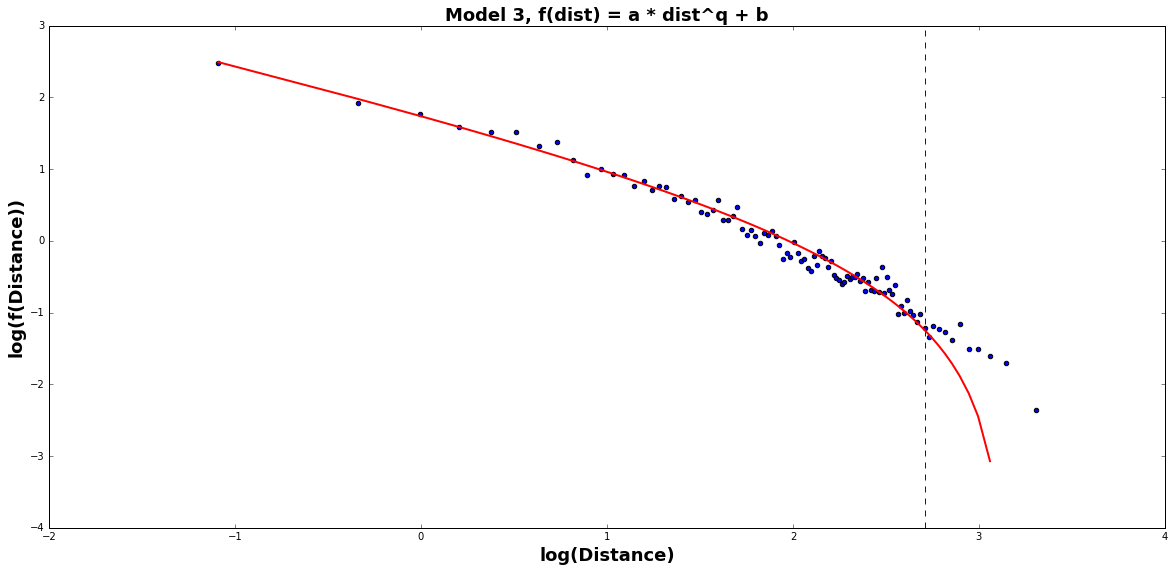

In [3]:
GM.Search_qstar_model3()

## The vertical line in plot is marked at log(15).
## So if we ignore the links "longer than 15 miles"--since the connection on that scale could be very weak in reality--this new model fits the data really well. And statistically speaking, more than 88% of the distance data falls below this threshold.
## (In fact, the distance between Wall Street and Yankee Stadium is less than 13 miles, and  about 18 miles from Central Park to Coney Island)
## Hence, one possible model is $$f(dist) = 6.627180 \cdot dist^{-0.62} - 0.948016$$

# Model 4
## Generalization of model 1:  $$f(dist) = \frac {1}{(a \cdot dist + b)^q}$$

The optimal q is 2.170000
The coefficients of this model are a = 0.083281, b = 0.417067
The R square of this model is 0.972983

-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <0> + <intercept>

Number of Observations:         100
Number of Degrees of Freedom:   2

R-squared:         0.9730
Adj R-squared:     0.9727

Rmse:              0.0735

F-stat (1, 98):  3529.3687, p-value:     0.0000

Degrees of Freedom: model 1, resid 98

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             0     0.0833     0.0014      59.41     0.0000     0.0805     0.0860
     intercept     0.4171     0.0144      28.91     0.0000     0.3888     0.4453
---------------------------------End of Summary---------------------------------



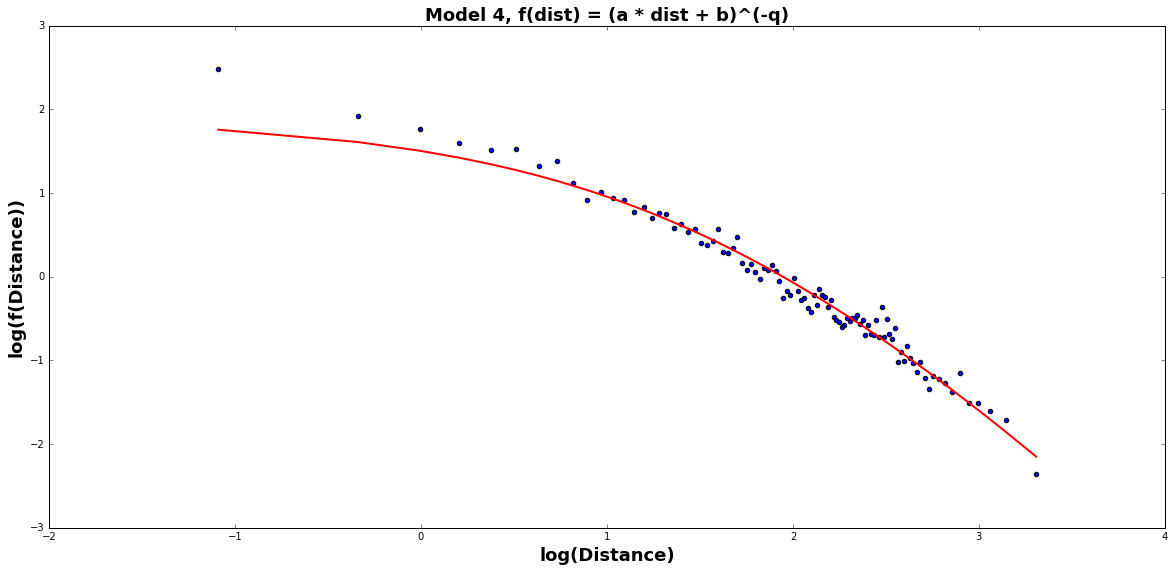

In [3]:
GM.Search_qstar_model4()

## The biggest advantage of model4, compared to model3, is we don't need to drop any so-called "outliers" anymore, this model basically fits for all data. But the $R^2$ drops slightly, and judging from the plot, its prediction accuracy may be weaker than model3 for smaller values (dist < 2 miles).
## The model looks like:  $$f(dist) = \frac {1}{(0.083281 \cdot dist + 0.417067)^{2.17}}$$

#  All parameters are estimated based on Twitter data from Nov. 2015 to Feb. 2016, we'll test these models when new data is available (from March to April)